# Cluster Analysis in Python

> exploring unsupervised learning through clustering using the SciPy library in Python

- author: Victor Omondi
- toc: true
- categories: [cluster-analysis, unsupervised-learning]
- comments: true
- image: images/ca-python-shield.png

# Overview

You have probably come across Google News, which automatically groups similar news articles under a topic. Have you ever wondered what process runs in the background to arrive at these groups? We will be exploring unsupervised learning through clustering using the SciPy library in Python. We will cover pre-processing of data and application of hierarchical and k-means clustering. We will explore player statistics from a popular football video game, FIFA 18. We will be able to quickly apply various clustering algorithms on data, visualize the clusters formed and analyze results.

# Libraries

In [22]:
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import (linkage, 
                                     fcluster)
from scipy.cluster.vq import (kmeans, 
                              vq, 
                              whiten)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

# Introduction to Clustering

Before we are ready to classify news articles, we need to be introduced to the basics of clustering. We will familiarize ourselves with a class of machine learning algorithms called unsupervised learning and clustering, one of the popular unsupervised learning algorithms. We will explore two popular clustering techniques - hierarchical clustering and k-means clustering. We will conclude with basic pre-processing steps before we start clustering data.

## Unsupervised learning: basics

> ### Everyday example: Google news
- How does Google News classify articles?
- Unsupervised Learning Algorithm: **Clustering**
- Match frequent terms in articles to find similarity

> ### What is unsupervised learning?
- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified or characterized
- The objective of the algorithm is to interpret any structure in the data
- Common unsupervised learning algorithms: clustering, neural networks, anomaly detection

> ### What is clustering?
- The process of grouping items with similar characteristics
- Items in groups similar to each other than in other groups
- **Example**: distance between points on a 2D plane

> ### Plotting data for clustering - Pokemon sightings

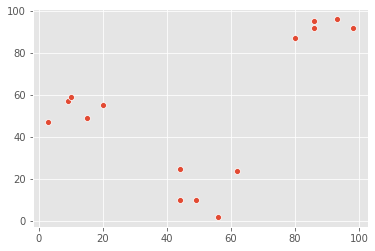

In [2]:
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]

_ = sns.scatterplot(x_coordinates, y_coordinates)
plt.show()

Visualizing helps in determining how many clusters are in the data.

### Unsupervised learning in real world

Segmentation of learners at DataCamp based on courses they complete. The training data has no labels. As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.

### Pokémon sightings

There have been reports of sightings of rare, legendary Pokémon. We have been asked to investigate! We will plot the coordinates of sightings to find out where the Pokémon might be. The X and Y coordinates of the points are stored in list x_p and y_p, respectively

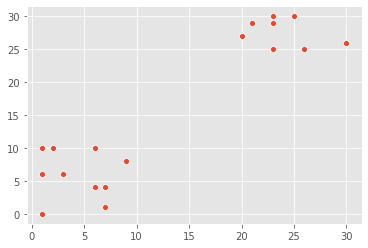

In [3]:
x_p = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y_p = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

_ = sns.scatterplot(x_p, y_p)
plt.show()

Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of cluster analysis

> ### What is a cluster?
- A group of items with similar characteristics
- Google News: articles where similar words andword associations appear together
- Customer Segments


> ### Clustering algorithms
- Hierarchical clustering
- K means clustering
- Other clustering algorithms: DBSCAN, Gaussian Methods

> ### Hierarchical clustering in SciPy

In [5]:
x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4, 10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4, 47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df_c = pd.DataFrame({'x_cood':x_coordinates, 'y_cood':y_coordinates})
df_c.head()

,x_cood,y_cood
0,80.1,87.2
1,93.1,96.1
2,86.6,95.6
3,98.5,92.4
4,86.4,92.4


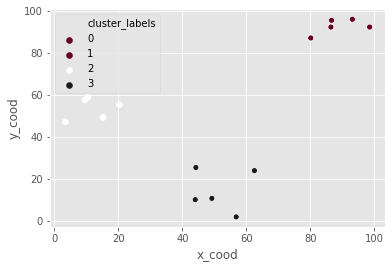

In [8]:
Z_c = linkage(df_c, method="ward")
df_c['cluster_labels'] = fcluster(Z_c, 3, criterion="maxclust")
_ = sns.scatterplot(data=df_c, x="x_cood", y="y_cood", hue="cluster_labels", palette="RdGy")
plt.show()

> ### K-means clustering in SciPy

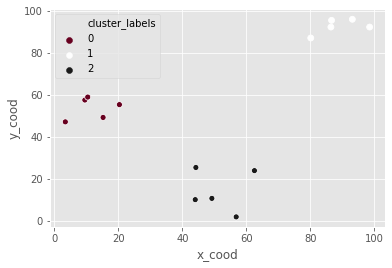

In [14]:
df_c = pd.DataFrame({'x_cood':x_coordinates, 'y_cood':y_coordinates})
centroids_c, _ = kmeans(df_c, 3)
df_c["cluster_labels"], _ = vq(df_c, centroids_c)
_ = sns.scatterplot(data=df_c, x="x_cood", y="y_cood", hue="cluster_labels", palette="RdGy")
plt.show()

### Pokémon sightings: hierarchical clustering

We are going to continue the investigation into the sightings of legendary Pokémon. In the scatter plot we identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. We will form two clusters of the sightings using hierarchical clustering.

In [15]:
df_p = pd.DataFrame({'x':x_p, 'y':y_p})
df_p.head()

,x,y
0,9,8
1,6,4
2,2,10
3,3,6
4,1,0


'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, 

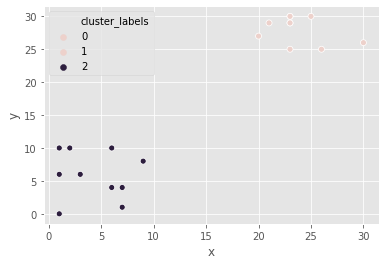

In [16]:
# Use the linkage() function to compute distance
Z_p = linkage(df_p, 'ward')

# Generate cluster labels for each data point with two clusters
df_p['cluster_labels'] = fcluster(Z_p, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df_p)
plt.show()

the resulting plot has an extra cluster labelled 0 in the legend.

### Pokémon sightings: k-means clustering

We are going to continue the investigation into the sightings of legendary Pokémon. We will use the same example of Pokémon sightings. We will form clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame

In [19]:
df_p.dtypes

x                 int64
y                 int64
cluster_labels    int32
dtype: object

In [20]:
df_p = df_p.apply(lambda x: x.astype("float"))

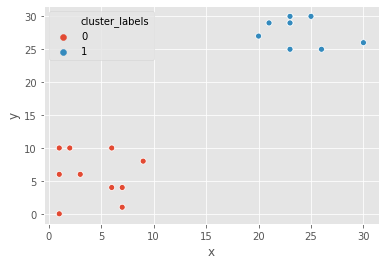

In [21]:
# Compute cluster centers
centroids_p, _ = kmeans(df_p, 2)

# Assign cluster labels to each data point
df_p['cluster_labels'], _ = vq(df_p, centroids_p)

# Plot the points with seaborn
sns.scatterplot(x="x", y="y", hue="cluster_labels", data=df_p)
plt.show()

## Data preparation for cluster analysis


> ### Why do we need to prepare data for clustering?
- Variables have incomparable units (product dimensions in cm, price in \$)
- Variables with same units have vastly different scales and variances (expenditures on cereals, travel)
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- **Solution**: normalization of individual variables


> ### Normalization of data
- **Normalization**: process of rescaling data to a standard deviation of 1
```python
x_new = x / std_dev(x)
```

In [28]:
data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)
scaled_data

array([2.72733941, 0.54546788, 1.63640365, 1.63640365, 1.09093577,
       1.63640365, 1.63640365, 4.36374306, 0.54546788, 1.09093577,
       1.09093577, 1.63640365, 2.72733941])

> ### Illustration: normalization of data

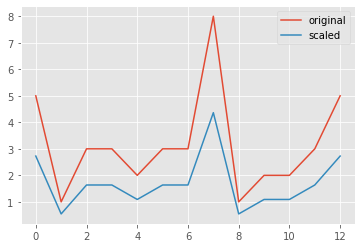

In [29]:
_ = sns.lineplot(x=range(len(data)), y=data, label="original")
_ = sns.lineplot(x=range(len(data)), y=scaled_data, label='scaled')
plt.show()

### Normalize basic list data

let us try to normalize some data. `goals_for` is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the `whiten()` function.



In [30]:
goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_goals_for = whiten(goals_for)
scaled_goals_for

array([3.07692308, 2.30769231, 1.53846154, 2.30769231, 0.76923077,
       0.76923077, 1.53846154, 0.        , 0.76923077, 3.07692308])

the scaled values have less variations in them.

### Visualize normalized data

After normalizing the data, we can compare the scaled data to the original data to see the difference.

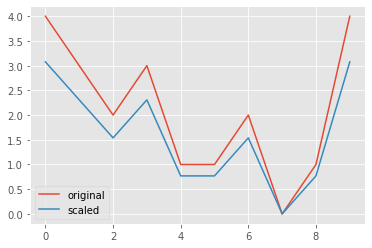

In [33]:
_ = sns.lineplot(x=range(len(goals_for)), y=goals_for, label="original")
_ = sns.lineplot(x=range(len(goals_for)), y=scaled_goals_for, label="scaled")
plt.show()

scaled values have lower variations in them.

### Normalization of small numbers

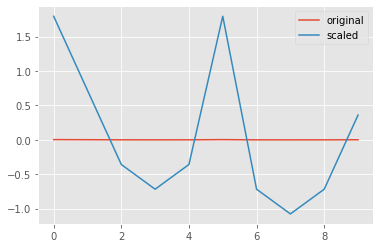

In [34]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_rate_cuts = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_rate_cuts, label='scaled')

plt.legend()
plt.show()

the original data are negligible as compared to the scaled data

### FIFA 18: Normalize data

FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that we are about to work on contains data on the 1000 top individual players in the game. We will explore various features of the data as we move ahead.

In [36]:
fifa = pd.read_csv("datasets/fifa.csv")
fifa.head()

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True


We will work with two columns, `eur_wage`, the wage of a player in Euros and `eur_value`, their current transfer market value.

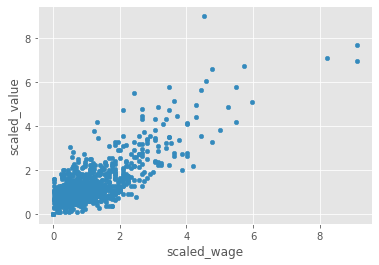

In [37]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x="scaled_wage", y="scaled_value", kind='scatter')
plt.show()

In [38]:
# Check mean and standard deviation of scaled values
fifa[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064


the scaled values have a standard deviation of 1.

# Hierarchical Clustering

We willl focus on a popular clustering algorithm - hierarchical clustering - and its implementation in SciPy. In addition to the procedure to perform hierarchical clustering, it attempts to help you answer an important question - how many clusters are present in your data? We will conclude with a discussion on the limitations of hierarchical clustering and discuss considerations while using hierarchical clustering.

## Basics of hierarchical clustering

> ### Creating a distance matrix using linkage
```python
scipy.cluster.hierarchy.linkage(observations,
                                method='single',
                                metric='euclidean',
                                optimal_ordering=False
)
```
- `method`: how to calculate the proximity of clusters
- `metric`: distance metric
- `optimal_ordering`: order data points

> ### Which method should use?
- **single**: based on two closest objects
- **complete**: based on two farthest objects
- **average**: based on the arithmetic mean of all objects
- **centroid**: based on the geometric mean of all objects
- **median**: based on the median of all objects
- **ward**: based on the sum of squares


> ### Create cluster labels with fcluster
```python
scipy.cluster.hierarchy.fcluster(distance_matrix,
                                 num_clusters,
                                 criterion
)
```
- `distance_matrix`: output of `linkage()` method
- `num_clusters`: number of clusters
- `criterion`: how to decide thresholds to form clusters

> ### Final thoughts on selecting a method
- No one right method for all
- Need to carefully understand the distribution of data


### Hierarchical clustering: ward method

It is time for Comic-Con! Comic-Con is an annual comic-based convention held in major cities in the world. We have the data of last year's footfall, the number of people at the convention ground at a given time. We would like to decide the location of the stall to maximize sales. Using the ward method, we'll apply hierarchical clustering to find the two points of attraction in the area.

In [39]:
comic_con = pd.read_csv("datasets/comic_con.csv")
comic_con.head()

,x_coordinate,y_coordinate,x_scaled,y_scaled
0,17,4,0.509349,0.090010
1,20,6,0.599234,0.135015
2,35,0,1.048660,0.000000
3,14,0,0.419464,0.000000
4,37,4,1.108583,0.090010


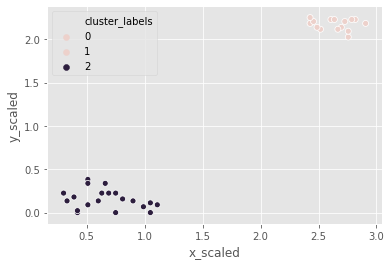

In [40]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method = "ward", metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

the two clusters correspond to the points of attractions in the figure towards the bottom (a stage) and the top right (an interesting stall).

### Hierarchical clustering: single method

Let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

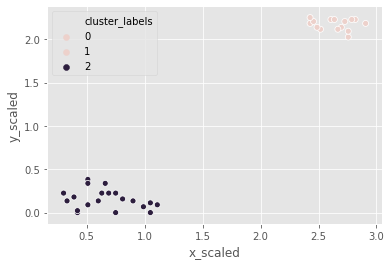

In [41]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method = "single", metric = "euclidean")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

the clusters formed are not different from the ones created using the ward method.

### Hierarchical clustering: complete method

For the third and final time, let us use the same footfall dataset and check if any changes are seen if we use a different method for clustering.

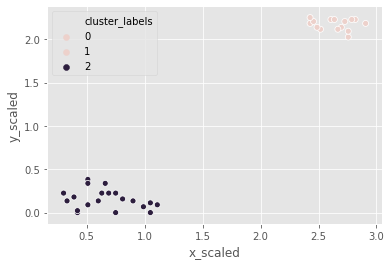

In [42]:
# Use the linkage() function
distance_matrix_cc = linkage(comic_con[['x_scaled', 'y_scaled']], method="complete")

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix_cc, 2, criterion="maxclust")

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Coincidentally, the clusters formed are not different from the ward or single methods.

## Visualize clusters


